In [20]:
# Prettymaps
from prettymaps import *
# Vsketch
# import vsketch
# OSMNX
import osmnx as ox
# Matplotlib-related
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
from descartes import PolygonPatch
# Shapely
from shapely.geometry import *
from shapely.affinity import *
from shapely.ops import unary_union
import matplotlib.font_manager as fm

In [ ]:
fig, ax = plt.subplots(figsize = (20, 20), constrained_layout = True)
palette = ['#28536B','#A69CAC','#D2E59E']
dilate = 0
background_c = '#f4e5cb'
layers = plot(
  #Centre the map center at 
#     'the depot, london',
#   (53.2839064,-9.0837657),
    'Roscam, Galway',
  #Set radius for the map
  radius = 940,
  ax=ax,
  #Name and select the various layers we want on the map
  #We want a square map so ensure that we're not querying for data in a circle
  layers = {
      #we want a square layout, so 
      'perimeter': {},
            'streets': {
                'width': {
                    'motorway': 5,
                    'trunk': 5,
                    'primary': 4.5,
                    'secondary': 4,
                    'tertiary': 3.5,
                    'cycleway': 3.5,
                    'residential': 3,
                    'service': 2,
                    'unclassified': 2,
                    'pedestrian': 2,
                    'footway': 1
                },
                'circle': False, 'dilate': dilate
            },
            'building': {'tags': {'building': True, 'landuse': 'construction'}, 'union': True, 'circle': False, 'dilate': dilate},
#             'water': {
#                 'tags':{
#                     'waterway': True,
#                     'water': True,
#                     'harbour': True,
#                     'marina': True,
#                     'bay': True,
#                     'river': True,
#                     'sea' : True,
#                     'estuary' : True,
#                     'canal' : True,
#                     'ocean' : True,
#                     'harbour' : True
# #                     'natural' : True
#                 }, 
#                 'circle': False, 'dilate': dilate
#             },
            'water': {'tags': {'natural': ['water', 'bay', 'wetland'], 'waterway': ['ditch', 'stream', 'weir'], 'landuse': ['basin', 'reservoir'], 'water': True},'circle': False, 'dilate': dilate
            },
            'forest': {'tags': {'landuse': 'forest'}, 'circle': False, 'dilate': dilate},
            'green': {'tags': {'landuse': ['grass', 'orchard'], 'natural': ['island', 'wood'], 'leisure': 'park'}, 'circle': False, 'dilate': dilate},
            'beach': {'tags': {'natural': 'beach'}, 'circle': False, 'dilate': dilate},
            'cemeterystuff': {'tags': {'landuse': ['cemetery']},'circle': True, 'dilate': dilate},
            'parking': {'tags': {'amenity': 'parking', 'highway': 'pedestrian', 'man_made': 'pier'}, 'circle': False}
        },
        drawing_kwargs = {
            'perimeter': {'fill': False, 'lw': 0, 'zorder': 0},
            'background': {'fc': background_c, 'zorder': -1},
            'green': {'fc': '#8BB174', 'ec': '#2F3737', 'hatch_c': '#A7C497', 'hatch': 'ooo...', 'lw': 1, 'zorder': 1},
            'forest': {'fc': '#64B96A', 'ec': '#2F3737', 'lw': 1, 'zorder': 2},
            'water': {'fc': '#a8e1e6', 'ec': '#2F3737', 'hatch_c': '#9bc3d4', 'hatch': 'ooo...', 'lw': 1, 'zorder': 6},
            'beach': {'fc': '#FCE19C', 'ec': '#2F3737', 'hatch_c': '#d4d196', 'hatch': 'ooo...', 'lw': 1, 'zorder': 7},
            'parking': {'fc': background_c, 'ec': '#2F3737', 'lw': 1, 'zorder': 3},
            'streets': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 4},
            'building': {'palette': palette, 'ec': '#2F3737', 'lw': .5, 'zorder': 5},
            'cemeterystuff': {'fc': '#7BAE82', 'ec': '#2F3737', 'lw': 0, 'zorder': 1},
            'coastline': {'fc': '#a8e1e6', 'ec': '#2F3737', 'hatch_c': '#9bc3d4', 'hatch': 'ooo...', 'lw': 1, 'zorder': 8}

        },

        osm_credit = {'color': '#f4e5cb'}
)

# Set bounds
# xmin, ymin, xmax, ymax = layers['perimeter'].bounds
# dx, dy = xmax-xmin, ymax-ymin
# a = .2
# ax.set_xlim(xmin+a*dx, xmax-a*dx)
# ax.set_ylim(ymin+a*dy, ymax-a*dy)

# ax.text(
#    xmax-.35*dx, ymax+.02*dy,
#     "Galway",
#     color = '#2F3737',
#     fontproperties = fm.FontProperties(fname = '../font/PermanentMarker-Regular.ttf', size = 10),
# )

#Export a copy
plt.savefig('galway_2.png')

/usr/local/lib/python3.9/site-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.9/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.9/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.9/site-packages/prettymaps/fetch.py:317: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and 

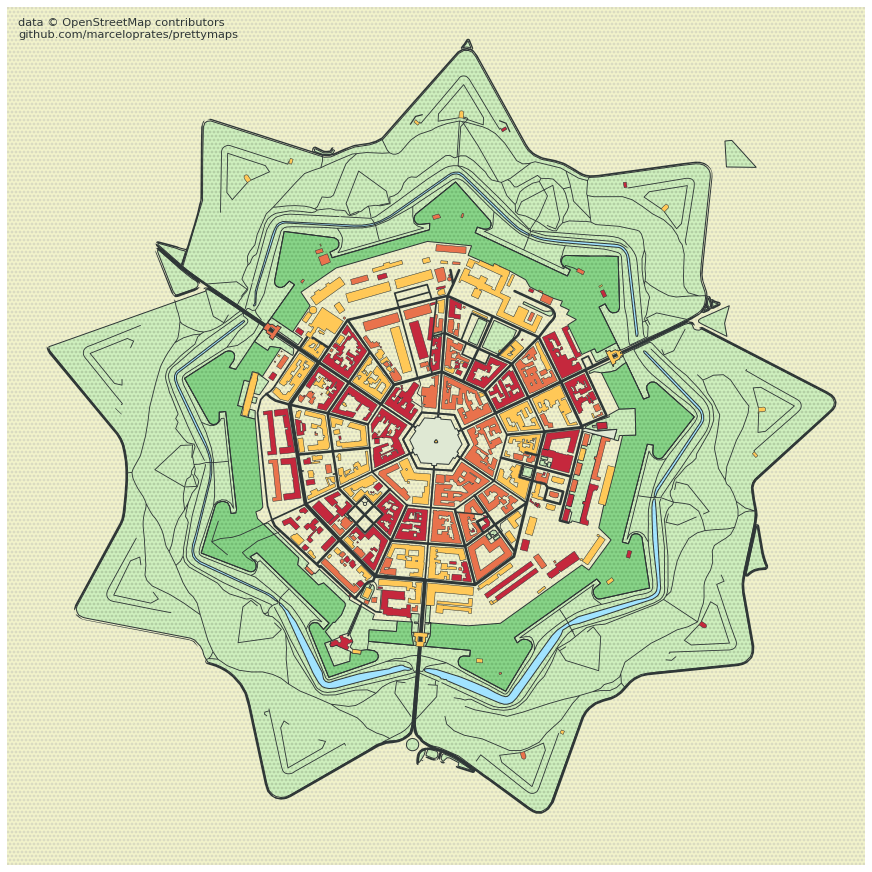

In [34]:
palette = ['#FFC857', '#E9724C', '#C5283D']

fig, ax = plt.subplots(figsize = (12, 12), constrained_layout = True)

def postprocessing(layers):
    boundary = Polygon(layers['green'].buffer(5)[0].exterior).buffer(0)
    layers['building'] = layers['building'].buffer(0).intersection(boundary)
    layers['streets'] = layers['streets'].buffer(0).intersection(boundary)
    return layers

layers = plot(
    'palmanova, Italy', radius = 970,
    
    ax = ax,

    postprocessing = postprocessing,
    
    layers = {
            'perimeter': {},
            'streets': {
                'width': {
                    'motorway': 5,
                    'trunk': 5,
                    'primary': 4.5,
                    'secondary': 4,
                    'tertiary': 3.5,
                    'residential': 3,
                    'service': 2,
                    'unclassified': 2,
                    'pedestrian': 2,
                    'footway': 1,
                    'track': 1,
                    'bridleway': 1
                }
            },
            'building': {'tags': {'building': True, 'landuse': 'construction'}, 'union': False},
            'water': {'tags': {'natural': ['water', 'bay']}},
            'green': {'tags': {'landuse': 'grass', 'natural': ['island', 'wood'], 'leisure': 'park'}},
            'scrub': {'tags': {'natural': 'scrub'}},
            'walls': {'tags': {'historic': 'citywalls'}},
            'pedestrian_way': {'tags': {'highway': 'pedestrian'}},
        },
        drawing_kwargs = {
            'background': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'hatch': 'ooo...', 'zorder': -1},
            'perimeter': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'lw': 0, 'hatch': 'ooo...',  'zorder': 0},
            'green': {'fc': '#D0F1BF', 'ec': '#2F3737', 'hatch_c': '#b3cfa5', 'hatch': 'ooo...', 'lw': 1, 'zorder': 1},
            'scrub': {'fc': '#89d689', 'ec': '#2F3737', 'hatch_c': '#75bd75', 'hatch': 'ooo...', 'lw': 1, 'zorder': 1},
            'water': {'fc': '#a1e3ff', 'ec': '#2F3737', 'lw': 1, 'zorder': 2},
            'streets': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 3},
            'walls': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 3},
            'building': {'palette': palette, 'ec': '#2F3737', 'lw': .5, 'zorder': 4},
            'pedestrian_way': {'fc': '#dfe8d3', 'ec': '#2F3737', 'lw': 1, 'zorder': 5},
        },

        osm_credit = {'color': '#2F3737'}
)

plt.savefig('palmanova.png')

/usr/local/lib/python3.9/site-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.9/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.9/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.9/site-packages/prettymaps/fetch.py:317: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and 

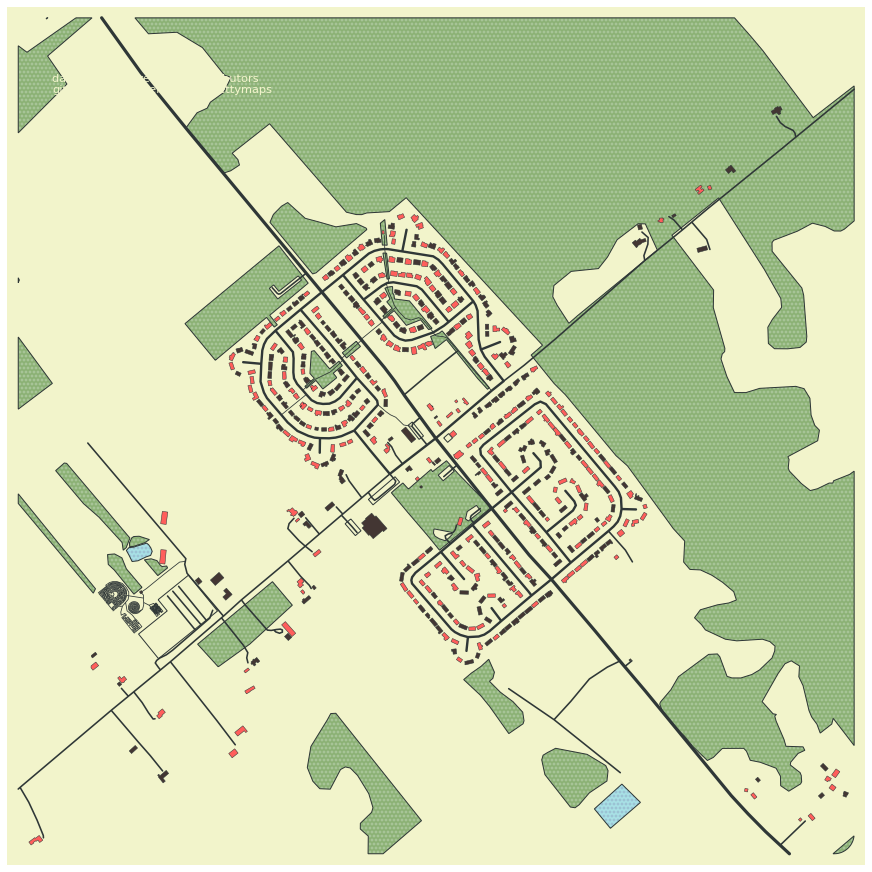

In [48]:
# General style parameters
palette = ['#433633', '#FF5E5B']
background_c = '#F2F4CB'
dilate = 50

# Setup plot
fig, ax = plt.subplots(figsize = (12, 12), constrained_layout = True)

layers = plot(
    'Munster, Ontario', radius = 1000,
    ax = ax,
    
    layers = {
            'perimeter': {},
            'streets': {
                'width': {
                    'motorway': 5,
                    'trunk': 5,
                    'primary': 4.5,
                    'secondary': 4,
                    'tertiary': 3.5,
                    'cycleway': 3.5,
                    'residential': 3,
                    'service': 2,
                    'unclassified': 2,
                    'pedestrian': 2,
                    'footway': 1,
                },
                'circle': False, 'dilate': dilate
            },
            'building': {'tags': {'building': True, 'landuse': 'construction'}, 'union': True, 'circle': False, 'dilate': dilate},
            'water': {'tags': {'natural': ['water', 'bay']}, 'circle': False, 'dilate': dilate},
            'forest': {'tags': {'landuse': 'forest'}, 'circle': False, 'dilate': dilate},
            'green': {'tags': {'landuse': ['grass', 'orchard', 'village_green'], 'natural': ['island', 'wood'], 'leisure': 'park'}, 'circle': False, 'dilate': dilate},
            'beach': {'tags': {'natural': 'beach'}, 'circle': False, 'dilate': dilate},
            'parking': {'tags': {'amenity': 'parking', 'highway': 'pedestrian', 'man_made': 'pier'}, 'circle': False}
        },
        drawing_kwargs = {
            'perimeter': {'fill': False, 'lw': 0, 'zorder': 0},
            'background': {'fc': background_c, 'zorder': -1},
            'green': {'fc': '#8BB174', 'ec': '#2F3737', 'hatch_c': '#A7C497', 'hatch': 'ooo...', 'lw': 1, 'zorder': 1},
            'forest': {'fc': '#64B96A', 'ec': '#2F3737', 'lw': 1, 'zorder': 2},
            'water': {'fc': '#a8e1e6', 'ec': '#2F3737', 'hatch_c': '#9bc3d4', 'hatch': 'ooo...', 'lw': 1, 'zorder': 3},
            'beach': {'fc': '#FCE19C', 'ec': '#2F3737', 'hatch_c': '#d4d196', 'hatch': 'ooo...', 'lw': 1, 'zorder': 3},
            'parking': {'fc': '#d8cede', 'ec': '#2F3737', 'lw': 1, 'zorder': 3},
            'streets': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 4},
            'building': {'palette': palette, 'ec': '#2F3737', 'lw': .5, 'zorder': 5},
            
        },

        osm_credit = {'x': .0405, 'y': .068, 'color': '#F2F4CB'}
)

# Set bounds
# xmin, ymin, xmax, ymax = layers['perimeter'].bounds
# dx, dy = xmax-xmin, ymax-ymin
# a = .2
# ax.set_xlim(xmin+a*dx, xmax-a*dx)
# ax.set_ylim(ymin+a*dy, ymax-a*dy)

# ax.text(
#     xmin+.39*dx, ymin+.305*dy,
#     ' '*3 + 'Stad van de Zon,\nHeerhugowaard, Netherlands',
#     color = '#2F3737',
#     zorder = 6, rotation = +1.75,
#     fontproperties = fm.FontProperties(fname = '../assets/Permanent_Marker/PermanentMarker-Regular.ttf', size = 24)
# )

plt.savefig('heerhugowaard.png')
#plt.savefig('../prints/heerhugowaard.svg')

/usr/local/lib/python3.9/site-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.9/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.9/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.9/site-packages/prettymaps/fetch.py:317: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and 

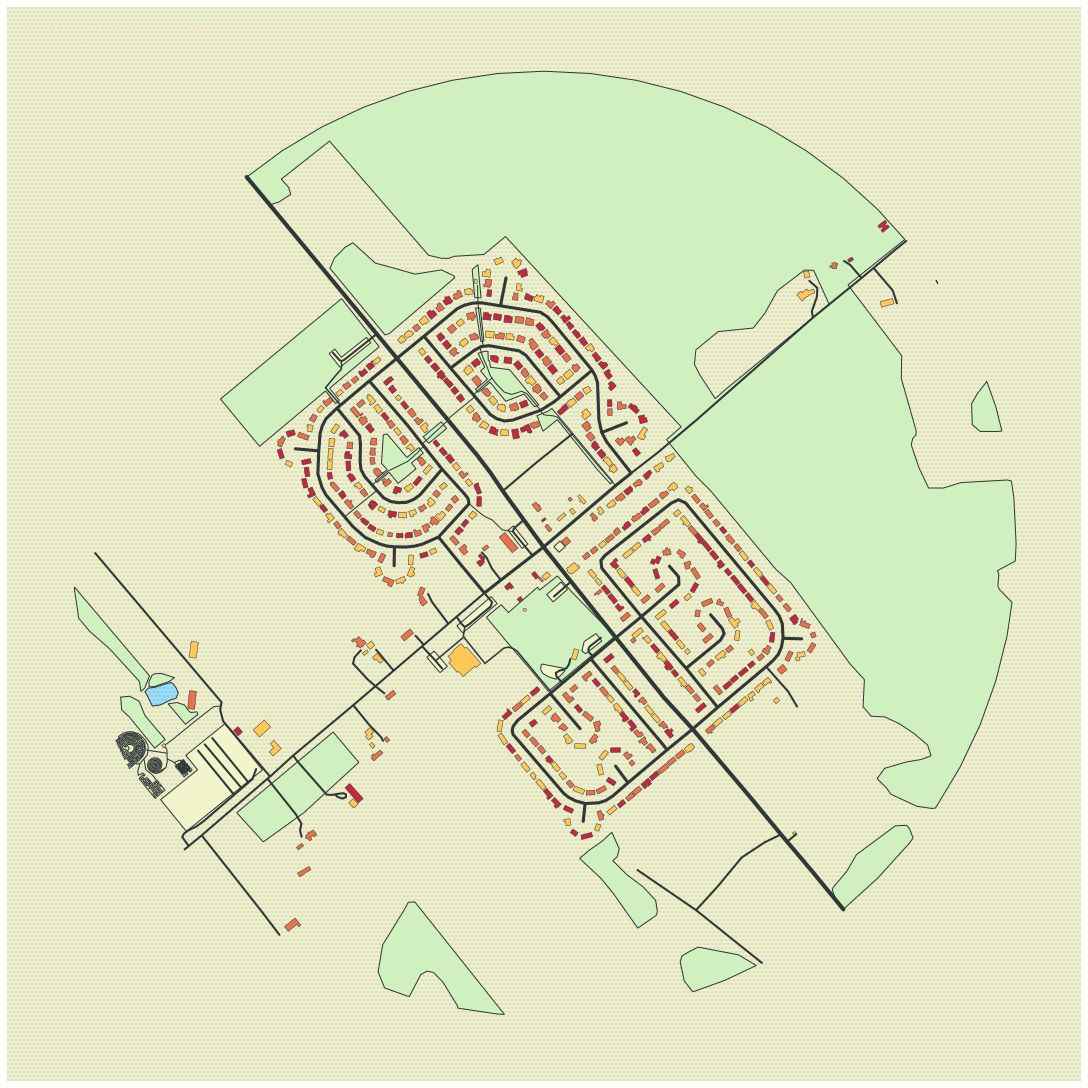

In [25]:
fig, ax = plt.subplots(figsize = (15, 15), constrained_layout = True)
background_c = '#F2F4CB'
palette = ['#433633', '#FF5E5B']
layers = plot(
    'Munster, Ontario, Canada', radius = 920,
    ax = ax,
    layers = {
            'perimeter': {},
            'streets': {
                'custom_filter': '["highway"~"motorway|trunk|primary|secondary|tertiary|residential|service|unclassified|pedestrian|footway|trunk|cycleway|bridleway|path"]',
                'width': {
                    'motorway': 5,
                    'trunk': 5,
                    'primary': 4.5,
                    'secondary': 4,
                    'tertiary': 3.5,
                    'residential': 3,
                    'service': 2,
                    'unclassified': 2,
                    'pedestrian': 2,
                    'footway': 1,
                    'trunk': 5,
                    'cycleway': 3.5,
                    'bridleway': 1,
                    'path' : 1.5
                }
            },
            'building': {'tags': {'building': True, 'landuse': 'construction'}, 'union': True, 'circle': True,
            'dilate': dilate},
            'water': {'tags': {'natural': ['water', 'bay']}},
            'green': {'tags': {'landuse': ['grass', 'orchard', 'village_green'], 'natural': ['island', 'wood'], 'leisure': 'park'}},
            'forest': {'tags': {'landuse': 'forest'}},
            'parking': {
            'tags': {
                'amenity': 'parking', 
                'highway': 'pedestrian', 
                'man_made': 'pier'
            }, 
            'circle': False,
            'dilate': dilate
        },
            'pedestrian_way': {
            'tags': {
                'highway': 'pedestrian'
            },
            'circle': False,
            'dilate': dilate
        },
            'parking': {'tags': {'amenity': 'parking', 'highway': 'pedestrian', 'man_made': 'pier'}}
        },
        drawing_kwargs = {
            'background': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'hatch': 'ooo...', 'zorder': -1},
            'perimeter': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'lw': 0, 'hatch': 'ooo...',  'zorder': 0},
            'green': {'fc': '#D0F1BF', 'ec': '#2F3737', 'lw': 1, 'zorder': 1},
            'forest': {'fc': '#64B96A', 'ec': '#2F3737', 'lw': 1, 'zorder': 1},
            'water': {'fc': '#a1e3ff', 'ec': '#2F3737', 'hatch': 'ooo...', 'hatch_c': '#85c9e6', 'lw': 1, 'zorder': 2},
            'parking': {'fc': '#F2F4CB', 'ec': '#2F3737', 'lw': 1, 'zorder': 3},
            'streets': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 4},
            'building': {'palette': ['#FFC857', '#E9724C', '#C5283D'], 'ec': '#2F3737', 'lw': .5, 'zorder': 4},
        },

        osm_credit = {'color': '#f4e5cb'}
)

plt.savefig('munster.png')
#plt.savefig('../prints/macao.svg')

/usr/local/lib/python3.9/site-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.9/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.9/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.9/site-packages/prettymaps/fetch.py:317: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and 

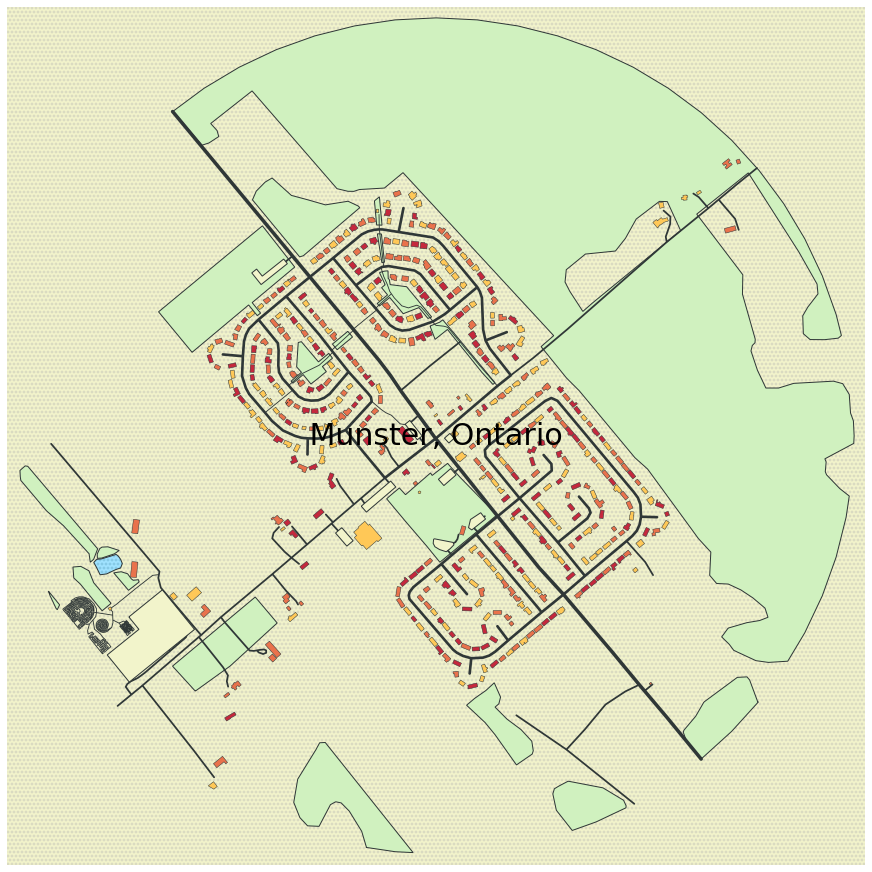

In [52]:
# Create a map bed 

fig, ax = plt.subplots(figsize = (12, 12), constrained_layout = True)
layers = plot(

'munster, ontario', # The coordinates of the center of the circle , Format ：( latitude , longitude )

radius = 950, # radius 

ax = ax, # Binding drawing bed 

layers = {

'perimeter': {}, # Controls the drawing mode ,{} That is, it is equivalent to circular drawing mode 

# The following parameters are used to define from OsmStreetMap Select the acquired vector layer features , If you don't understand it, you can copy it without change 

'streets': {

'custom_filter': '["highway"~"motorway|trunk|primary|secondary|tertiary|residential|service|unclassified|pedestrian|footway"]',

'width': {

'motorway': 5,

'trunk': 5,

'primary': 4.5,

'secondary': 4,

'tertiary': 3.5,

'residential': 3,

'service': 2,

'unclassified': 2,

'pedestrian': 2,

'footway': 1,

}

},

'building': {'tags': {'building': True, 'landuse': 'construction'}, 'union': False},

'water': {'tags': {'natural': ['water', 'bay']}},

'green': {'tags': {'landuse': 'grass', 'natural': ['island', 'wood'], 'leisure': 'park'}},

'forest': {'tags': {'landuse': 'forest'}},

'parking': {'tags': {'amenity': 'parking', 'highway': 'pedestrian', 'man_made': 'pier'}}

},

# The following parameters are used to define OpenStreetMap Styles of different vector layers in , If you feel troublesome, just copy the following official example 

drawing_kwargs = {

'background': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'hatch': 'ooo...', 'zorder': -1},

'perimeter': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'lw': 0, 'hatch': 'ooo...', 'zorder': 0},

'green': {'fc': '#D0F1BF', 'ec': '#2F3737', 'lw': 1, 'zorder': 1},

'forest': {'fc': '#64B96A', 'ec': '#2F3737', 'lw': 1, 'zorder': 1},

'water': {'fc': '#a1e3ff', 'ec': '#2F3737', 'hatch': 'ooo...', 'hatch_c': '#85c9e6', 'lw': 1, 'zorder': 2},

'parking': {'fc': '#F2F4CB', 'ec': '#2F3737', 'lw': 1, 'zorder': 3},

'streets': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 3},

'building': {'palette': ['#FFC857', '#E9724C', '#C5283D'], 'ec': '#2F3737', 'lw': .5, 'zorder': 4},

},
osm_credit = {'color': '#2F373700'}

)
# Add text annotations 

ax.text(

0.5, 0.5,

' Munster, Ontario ',

zorder = 6,

ha='center',

va='center',

fontsize=30,

fontproperties = fm.FontProperties(),
    

transform=ax.transAxes

)
# Export picture file 

plt.savefig(' Shanghai Bund - Add text annotations .png', dpi=500)

/usr/local/lib/python3.9/site-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.9/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.9/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.9/site-packages/prettymaps/fetch.py:317: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and 

/usr/local/lib/python3.9/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.9/site-packages/prettymaps/fetch.py:222: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  multipolys = reduce(lambda x,y: x+y, [list(x) for x in multipolys]) if len(multipolys) > 0 else []
/usr/local/lib/python3.9/site-packages/prettymaps/fetch.py:222: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  multipolys = reduce(lambda x,y: x+y, [list(x) for x in multipolys]) if le

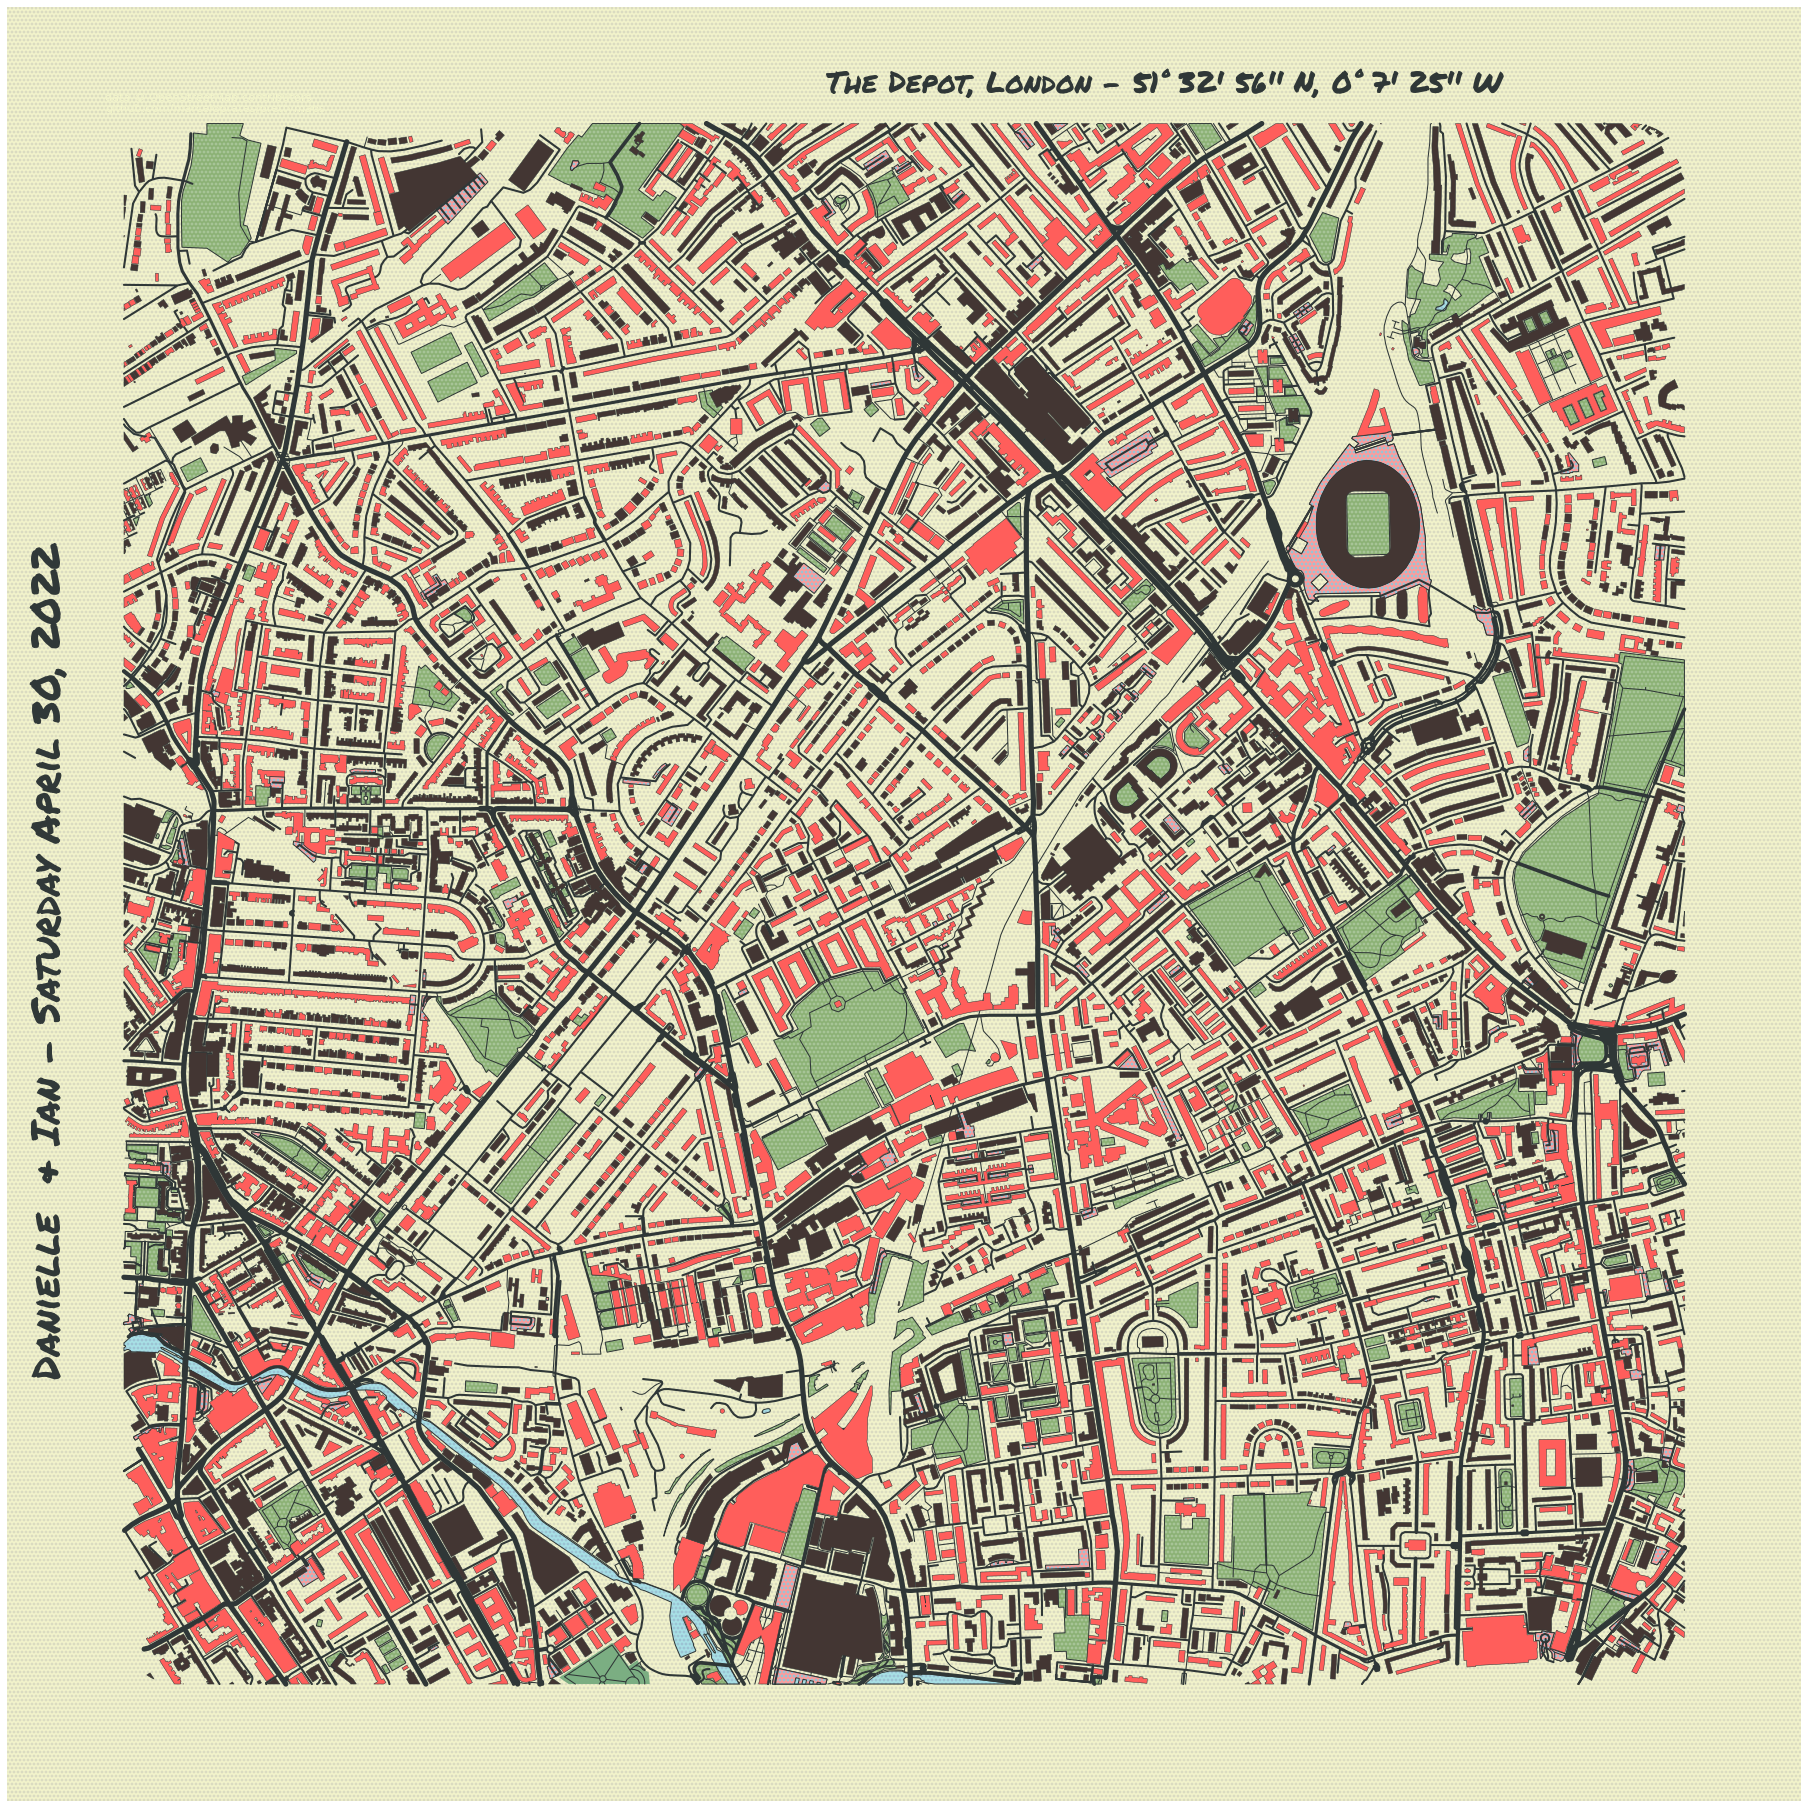

In [99]:
palette = ['#433633', '#FF5E5B']
background_c = '#F2F4CB'
dilate = 100

# Setup figure
fig, ax = plt.subplots(figsize = (25, 25), constrained_layout = True)

# Plot
layers = plot(
    'the depot, london', radius = 1400,
    ax = ax,
    layers = {
        'perimeter': {'circle': False, 'dilate': dilate},
        'streets': {
            'width': {
                'primary': 5,
                'secondary': 4,
                'tertiary': 3,
                'residential': 2,
                'footway': 1,
                'motorway': 5,
                'trunk': 5,
                'cycleway': 3.5,
                'track': 1,
                'service': 2,
                'unclassified': 2,
                'pedestrian': 2,
                'footway': 1,
                'bridleway': 1,
                'path' : 1
            },
            'circle': False,
            'dilate': dilate
        },
        'building': {
            'tags': {'building': True, 'landuse': 'construction'},
            'union': True,
            'circle': False,
            'dilate': dilate
        },
        'green': {
            'tags': {
                'landuse': ['grass', 'village_green', 'orchard'],
                'natural': ['island', 'wood'], 
                'leisure': ['park', 'pitch', 'track']
            },
            'circle': False,
            'dilate': dilate
        },
        'parking': {
            'tags': {
                'amenity': 'parking', 
                'highway': 'pedestrian', 
                'man_made': 'pier'
            }, 
            'circle': False,
            'dilate': dilate
        },
        'water': {'tags': {'natural': ['water', 'bay', 'wetland'], 'waterway': ['ditch', 'stream', 'weir'], 'landuse': ['basin', 'reservoir'], 'water': True},'circle': False, 'dilate': dilate},
#         'water': {
#                 'tags':{
#                     'waterway': True,
#                     'water': True,
#                     'harbour': True,
#                     'marina': True,
#                     'bay': True,
#                     'river': True,
#                     'sea' : True,
#                     'estuary' : True,
#                     'canal' : True,
#                     'ocean' : True,
#                     'harbour' : True
#                 }, 
#                 'circle': True, 'dilate': dilate
#             },
        'pedestrian_way': {
            'tags': {
                'highway': 'pedestrian'
            },
            'circle': False,
            'dilate': dilate
        },
        'cemeterystuff': {'tags': {'landuse': ['cemetery']},'circle': False, 'dilate': dilate}
    },
    drawing_kwargs = {
        'background': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'hatch': 'ooo...', 'zorder': -1},
        'perimeter': {'fill': False, 'lw': 0, 'zorder': 0},
        'green': {'fc': '#8BB174', 'ec': '#2F3737', 'hatch_c': '#A7C497', 'hatch': 'ooo...', 'lw': 1, 'zorder': 1},
        'water': {'fc': '#a8e1e6', 'ec': '#2F3737', 'hatch_c': '#9bc3d4', 'hatch': 'ooo...', 'lw': 1, 'zorder': 3},
        'streets': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 4},
        'building': {'palette': palette, 'ec': '#2F3737', 'lw': .5, 'zorder': 5},
        'parking': {'fc': '#ff9b99', 'ec': '#2F3737', 'hatch_c': '#9bc3d4', 'hatch': 'ooo...', 'lw': 1, 'zorder': 2},
        'cemeterystuff': {'fc': '#7BAE82', 'ec': '#2F3737', 'lw': 0, 'zorder': 1}
    },
    osm_credit = {'x': .02, 'y': .01, 'color': '#F2F4CB'}
)

# Set bounds
xmin, ymin, xmax, ymax = layers['perimeter'].bounds
dx, dy = xmax-xmin, ymax-ymin
ax.set_xlim(xmin-.06*dx, xmax+.06*dx)
ax.set_ylim(ymin-.06*dy, ymax+.06*dy)

# Draw left text
ax.text(
    xmin-.06*dx, ymin+.2*dy,
    "Danielle  & Ian - Saturday April 30, 2022",
    color = '#2F3737',
    rotation = 90,
    fontproperties = fm.FontProperties(fname = '../font/PermanentMarker-Regular.ttf', size = 40),
)
# Draw top text
ax.text(
    xmax-.55*dx, ymax+.02*dy,
    "The Depot, London - 51° 32' 56'' N, 0° 7' 25'' W",
    color = '#2F3737',
    fontproperties = fm.FontProperties(fname = '../font/PermanentMarker-Regular.ttf', size = 30),
)

plt.savefig('london.png')

/usr/local/lib/python3.9/site-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.9/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.9/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.9/site-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated an

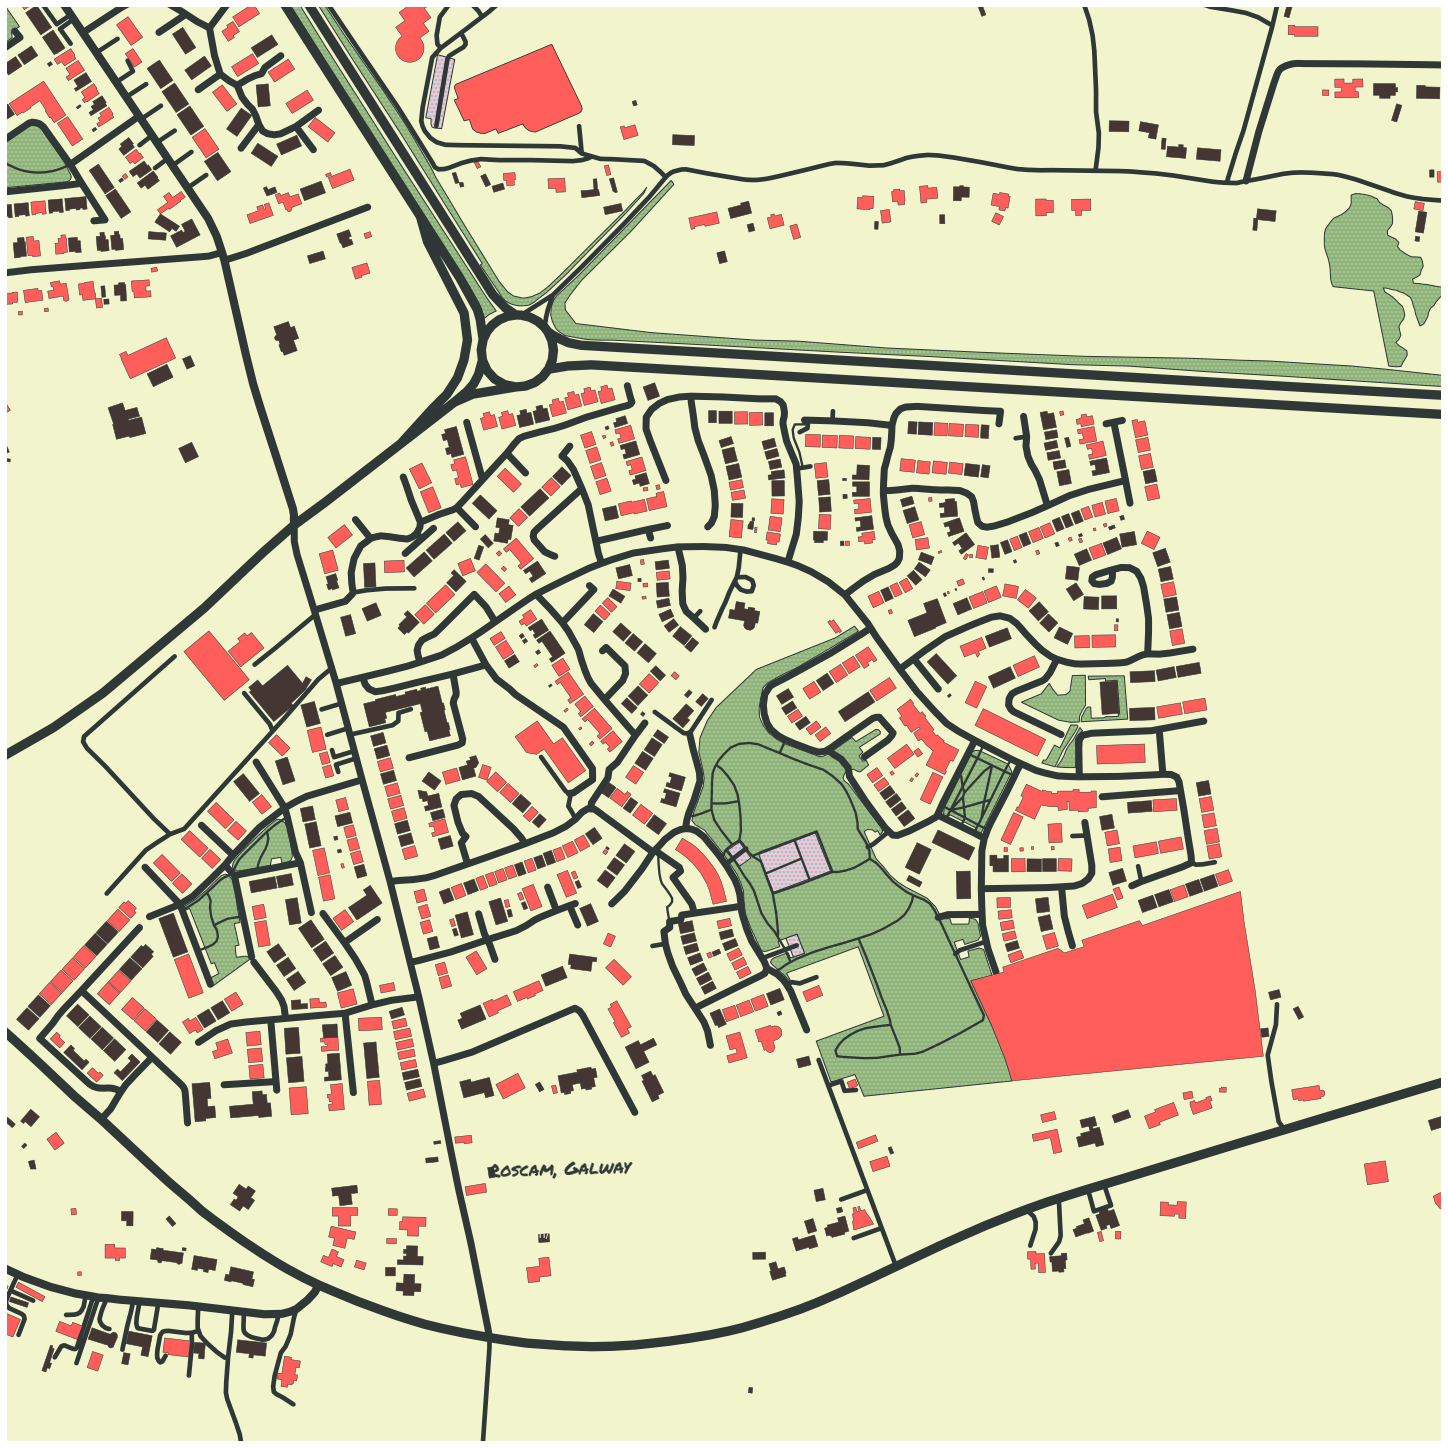

In [17]:
palette = ['#433633', '#FF5E5B']
background_c = '#F2F4CB'
dilate = 100
location = 'Roscam, Galway'

# Setup plot
fig, ax = plt.subplots(figsize = (20, 20), constrained_layout = True)

layers = plot(
    location,
#     'the depot, london', 
    radius = 1000,
    ax = ax,
    
    layers = {
            'perimeter': {},
            'streets': {
                'width': {
                    'motorway': 5,
                    'trunk': 5,
                    'primary': 4.5,
                    'secondary': 4,
                    'tertiary': 3.5,
                    'cycleway': 3.5,
                    'residential': 3,
                    'service': 2,
                    'unclassified': 2,
                    'pedestrian': 2,
                    'footway': 1,
                    'trunk': 5,
                    'bridleway': 1
                },
                'circle': True, 'dilate': dilate
            },
            'building': {'tags': {'building': True, 'landuse': 'construction'}, 'union': True, 'circle': False, 'dilate': dilate},
            'water': {'tags': {'natural': ['water', 'bay']}, 'circle': False, 'dilate': dilate},
            'forest': {'tags': {'landuse': 'forest'}, 'circle': False, 'dilate': dilate},
            'green': {'tags': {'landuse': ['grass', 'orchard', 'village_green'], 'natural': ['island', 'wood'], 'leisure': 'park'}, 'circle': False, 'dilate': dilate},
            'beach': {'tags': {'natural': 'beach'}, 'circle': False, 'dilate': dilate},
            'parking': {'tags': {'amenity': 'parking', 'highway': 'pedestrian', 'man_made': 'pier'}, 'circle': False}
        },
        drawing_kwargs = {
            'perimeter': {'fill': False, 'lw': 0, 'zorder': 0},
            'background': {'fc': background_c, 'zorder': -1},
            'green': {'fc': '#8BB174', 'ec': '#2F3737', 'hatch_c': '#A7C497', 'hatch': 'ooo...', 'lw': 1, 'zorder': 1},
            'forest': {'fc': '#64B96A', 'ec': '#2F3737', 'lw': 1, 'zorder': 2},
            'water': {'fc': '#a8e1e6', 'ec': '#2F3737', 'hatch_c': '#9bc3d4', 'hatch': 'ooo...', 'lw': 1, 'zorder': 3},
            'beach': {'fc': '#FCE19C', 'ec': '#2F3737', 'hatch_c': '#d4d196', 'hatch': 'ooo...', 'lw': 1, 'zorder': 3},
            'parking': {'fc': '#ffc7cd', 'ec': '#2F3737', 'hatch_c': '#9bc3d4', 'hatch': 'ooo...', 'lw': 1, 'zorder': 2},
            'streets': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 4},
            'building': {'palette': palette, 'ec': '#2F3737', 'lw': .5, 'zorder': 5}
            
        },

        osm_credit = {'x': .405, 'y': .68, 'color': '#F2F4CB'}
)

# Set bounds
xmin, ymin, xmax, ymax = layers['perimeter'].bounds
dx, dy = xmax-xmin, ymax-ymin
a = .2
ax.set_xlim(xmin+a*dx, xmax-a*dx)
ax.set_ylim(ymin+a*dy, ymax-a*dy)

ax.text(
    xmin+.39*dx, ymin+.305*dy,
    ' '*3 + location,
    color = '#2F3737',
    zorder = 6, rotation = +1.75,
    fontproperties = fm.FontProperties(fname = '../font/PermanentMarker-Regular.ttf', size = 18)
)

plt.savefig('caherfinsker.png')

/usr/local/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/usr/local/lib/python3.9/site-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.9/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.9/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.

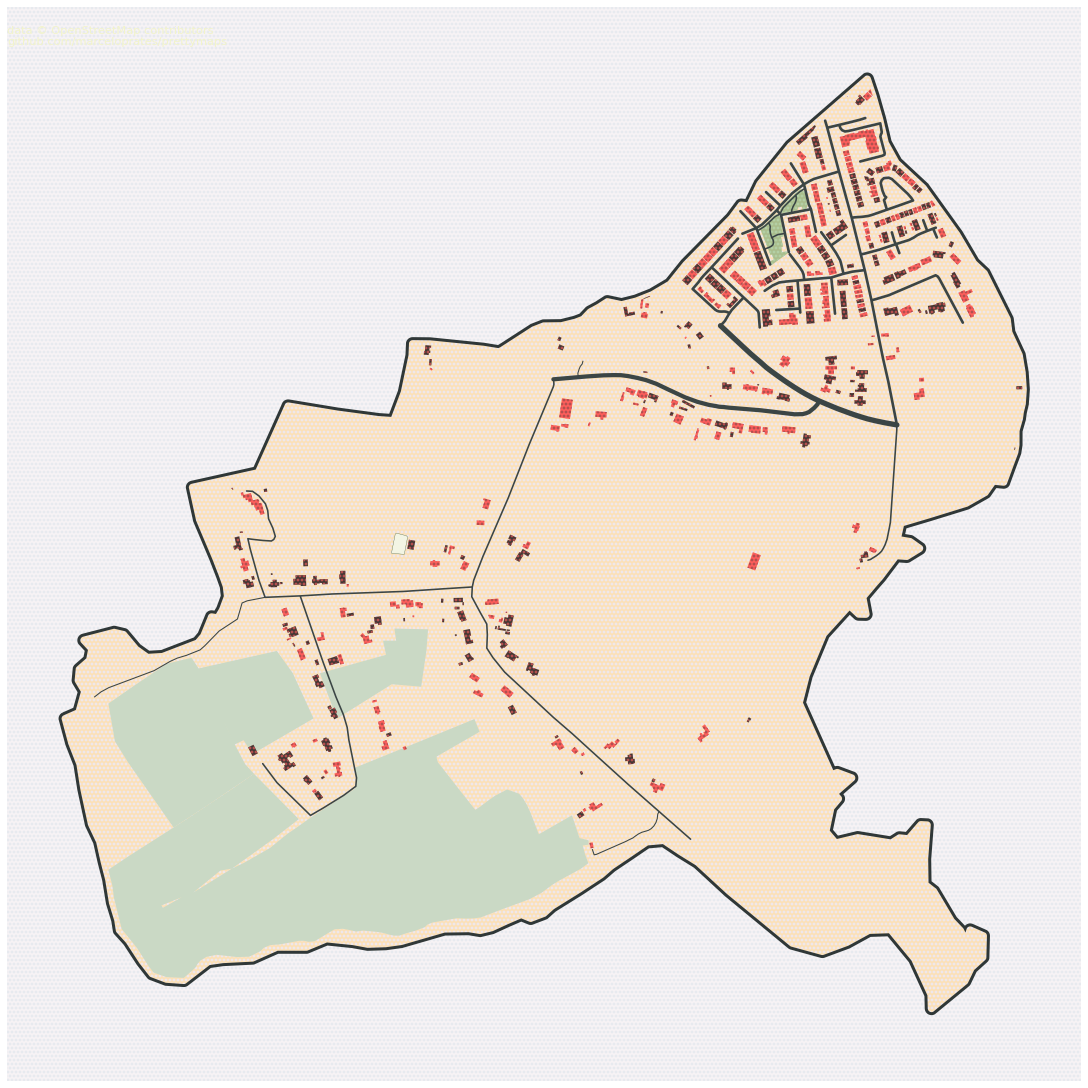

In [15]:
def postprocessing(layers):
    layers['perimeter'] = layers['perimeter'].buffer(10)
    return layers

fig, ax = plt.subplots(figsize = (15, 15), constrained_layout = True)

layers = plot(
#     'Roscam, Galway',
#     'Munster, Ontario',
#     ,radius = 930,
    
    ax = ax,
    
    postprocessing = postprocessing,

    layers = {
            'perimeter': {},
            'streets': {
                'width': {
                    'motorway': 6,
                    'trunk': 6,
                    'primary': 6,
                    'secondary': 5,
                    'tertiary': 4,
                    'residential': 2.5,
                    'living_street': 2.5,
                    'pedestrian': 1.5,
                    'footway': 1.5,
                    'track': 1,
                    'bridleway': 1,
                    'unclassified': 1.5,
                    'path': 1
                }
            },
            'building': {'tags': {'building': True, 'landuse': ['construction', 'education', 'commercial']}, 'union': True, 'circle': True, 'dilate': dilate},
            'water': {'tags': {'natural': ['water', 'bay']}},
            'green': {'tags': {'landuse': ['grass', 'orchard', 'village_green'], 'natural': ['island', 'wood'], 'leisure': 'park'}, 'circle': True, 'dilate': dilate},
            'parking': {'tags': {'amenity': 'parking', 'highway': 'pedestrian', 'man_made': 'pier'}, 'circle': True},
            'agriculture': {'tags':{'landuse': ['farmland']},'circle': True, 'dilate': dilate},
            'cemeterystuff': {'tags': {'landuse': ['cemetery']},'circle': True, 'dilate': dilate},
            'sportstuff': {'tags': {'leisure': ['pitch', 'track']},'circle': True, 'dilate': dilate}
            
        },
        drawing_kwargs = {
            'background': {'fc': '#F7F3F5', 'ec': '#e7eaef', 'hatch': 'ooo...', 'zorder': -1},
            'perimeter': {'fc': '#fce0b6', 'ec': '#2F3737', 'lw': 3, 'hatch': 'ooo...', 'hatch_c': '#EFE7EB',  'zorder': 0},
            'green': {'fc': '#AABD8C', 'ec': '#2F3737', 'hatch_c': '#b3cfa5', 'hatch': 'ooo...', 'lw': 0, 'zorder': 1},
            'water': {'fc': '#a1e3ff', 'hatch': 'ooo...', 'hatch_c': '#80bed9', 'lw': 0, 'zorder': 2},
            'agriculture': {'fc': '#cad9c5', 'ec': '#2F3737', 'lw': 0, 'zorder': 0},
            'sportstuff': {'fc': '#f3f5e4', 'ec': '#32512b', 'lw': 0.3, 'zorder': 4},
            'streets': {'fc': '#3b4545', 'lw': 0, 'zorder': 3},
            'parking': {'fc': '#ff9b99', 'ec': '#2F3737', 'hatch_c': '#9bc3d4', 'hatch': 'ooo...', 'lw': 1, 'zorder': 1},
            'building': {'palette': ['#433633', '#FF5E5B'], 'ec': '#2F3737', 'hatch': 'ooo...', 'hatch_c': '#b3504f', 'lw': 0, 'zorder': 4},
            'cemeterystuff': {'fc': '#7BAE82', 'ec': '#2F3737', 'lw': 0, 'zorder': 1}
        },

        osm_credit = {'color': '#F2F4CB'}
)

plt.savefig('centro-munster.png')

/usr/local/lib/python3.9/site-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.9/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.9/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.9/site-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated an

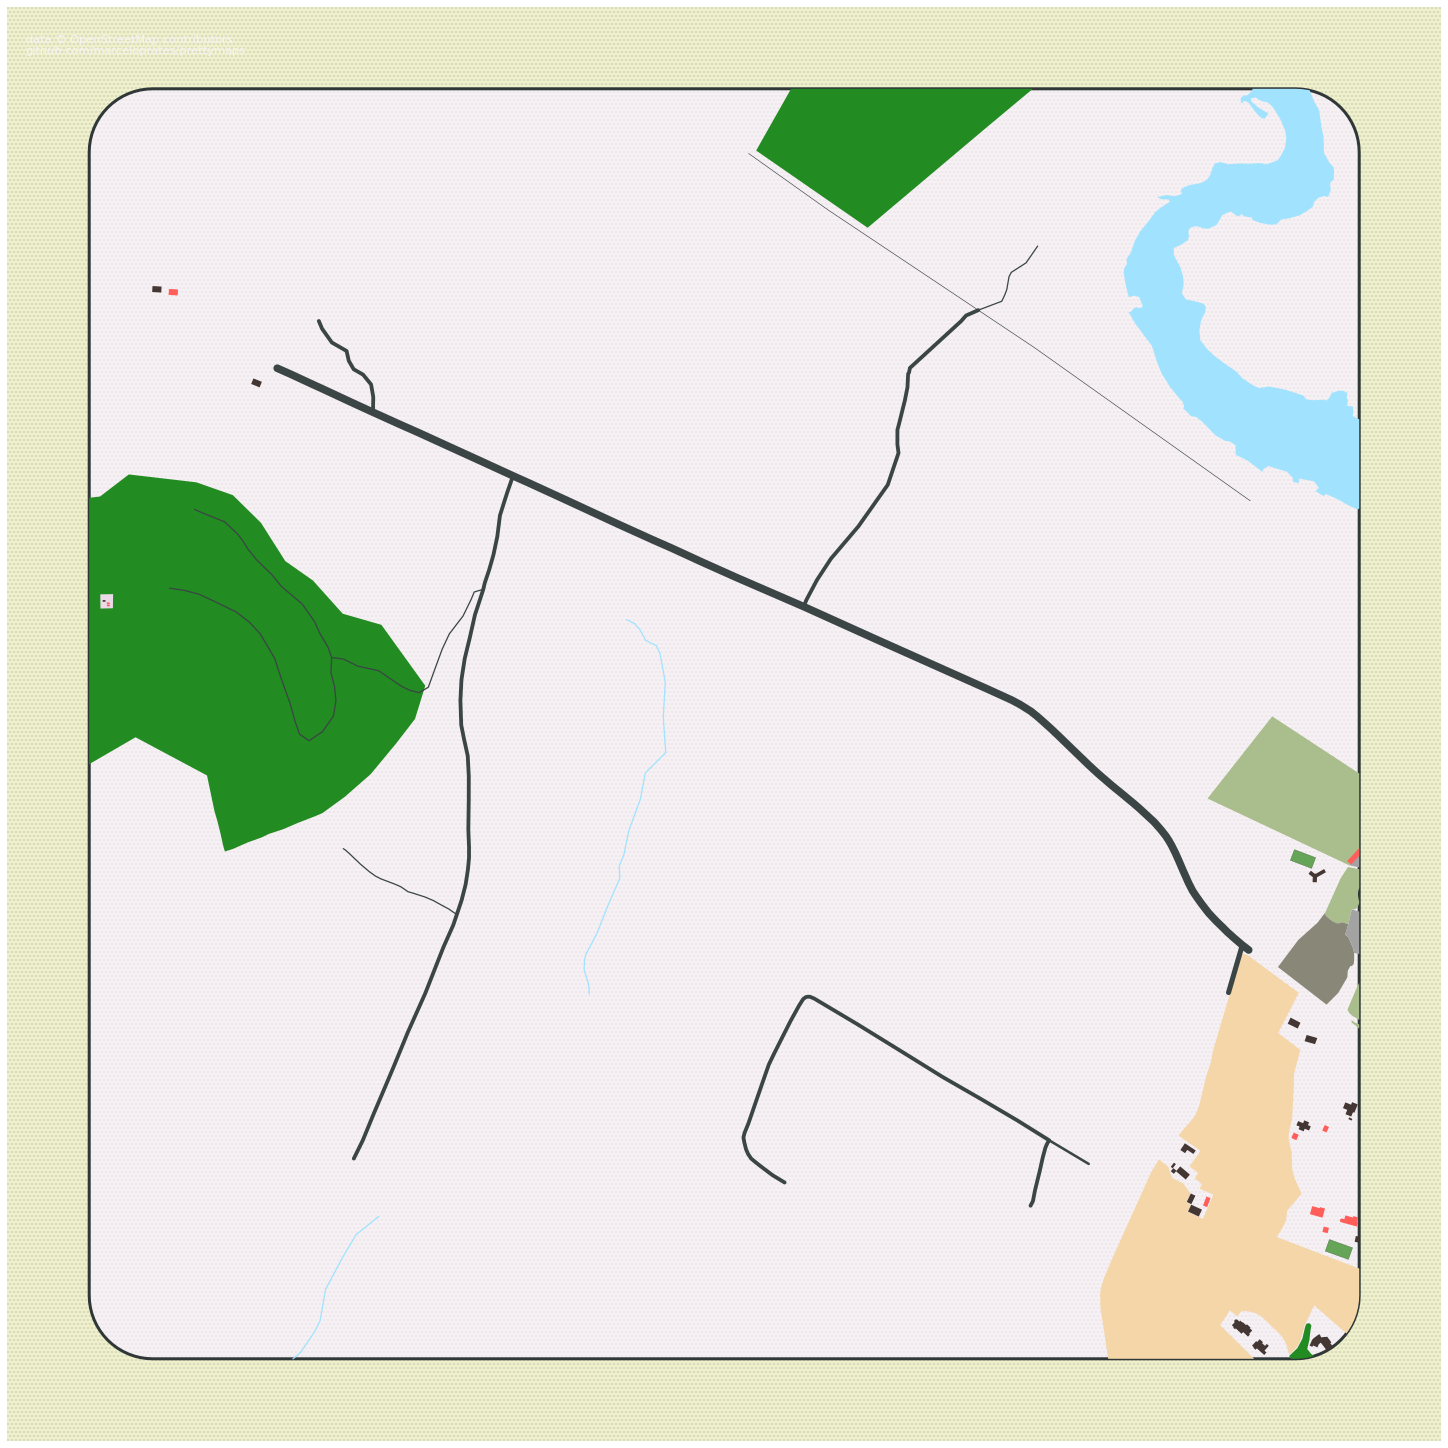

In [24]:
fig, ax = plt.subplots(figsize = (20, 20), constrained_layout = True)

dilate = 100
doCircle = False

layers = plot(
#     'Roscam, Galway',
#     'loughrea, galway',
    'Oranhill, Ireland',
    # Or coordinates  (52.516344, 13.377737)
    radius = 900,
    ax = ax,

    layers = {
            'perimeter': {'circle': doCircle, 'dilate': dilate},
            'streets': {
                'width': {
                    'motorway': 8,
                    'motorway_link': 3,
                    'service': 1,
                    'trunk': 6,
                    'primary': 6,
                    'secondary': 5,
                    'tertiary': 4,
                    'residential': 2,
                    'living_street': 2,
                    'pedestrian': 1.25,
                    'footway': 1.25,
                    'sideway': 1.25,
                    'track': 1,
                    'bridleway': 1,
                    'cycleway': 1,
                    'path': 0.5,
                    'unclassified': 3,
                    'construction': 1,
                }
            },
            'building': {'tags': {'building': True}, 'union': True,'circle': doCircle, 'dilate': dilate},
            'water': {'tags': {'natural': ['water', 'bay', 'wetland'], 'waterway': ['ditch', 'stream', 'weir'], 'landuse': ['basin', 'reservoir'], 'water': True},'circle': doCircle, 'dilate': dilate},
            'green': {'tags': {'landuse': ['grass', 'allotments', 'village_green', 'allotments', 'nature_reserve', 'recreation_ground', 'cemetery', 'meadow'], 'natural': ['island', 'grassland', 'scrub'], 'leisure': ['park', 'garden', 'sports_centre', 'playground']},'circle': doCircle, 'dilate': dilate},
            'cemeterystuff': {'tags': {'landuse': ['cemetery']},'circle': doCircle, 'dilate': dilate},
            'railway': {'custom_filter': '["railway"~"rail|light_rail|subway|tram"]', 'width': 2,'circle': doCircle, 'dilate': dilate},
            'forest': {'tags': {'landuse': ['forest'], 'natural': ['wood']},'circle': doCircle, 'dilate': dilate},
            'agriculture': {'tags':{'landuse': ['farmland']},'circle': doCircle, 'dilate': dilate},
            'developingLand': {'tags': {'landuse': ['brownfield', 'greenfield', 'construction', 'landfill']},'circle': doCircle, 'dilate': dilate},
            'sportstuff': {'tags': { 'leisure': ['pitch', 'track'] },'circle': doCircle, 'dilate': dilate},
            'parkplatz': {'tags': {'amenity': ['parking'], 'aeroway': ['apron', 'runway', 'taxiway']},'circle': doCircle, 'dilate': dilate},
            'gleisbett': {'tags': {'landuse': ['railway', 'industrial']},'circle': doCircle, 'dilate': dilate}
        },
        drawing_kwargs = {
            'background': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'hatch': 'ooo...', 'zorder': -1},
            'perimeter': {'fc': '#F7F3F5', 'ec': '#2F3737', 'lw': 3, 'hatch': 'ooo...', 'hatch_c': '#EFE7EB',  'zorder': 0},
            'green': {'fc': '#AABD8C', 'ec': '#2F3737', 'lw': 0, 'zorder': 1},
            'water': {'fc': '#a1e3ff', 'lw': 0, 'zorder': 3},
            'streets': {'fc': '#3b4545', 'lw': 0, 'zorder': 4},
            'building': {'palette': ['#433633', '#FF5E5B'], 'ec': '#2F3737', 'lw': 0, 'zorder': 3},
            'railway': {'fc': '#a8a8a8', 'ec': '#FF0000', 'alpha': 1, 'lw': 0, 'zorder': 3},
            'forest': {'fc': '#228b22', 'ec': '#2F3737', 'lw': 0, 'zorder': 1},
            'agriculture': {'fc': '#f5d6a8', 'ec': '#2F3737', 'lw': 0, 'zorder': 1},
            'developingLand': {'fc': '#898878', 'ec': '#2F3737', 'lw': 0, 'zorder': 1},
            'sportstuff': {'fc': '#66A457', 'ec': '#32512b', 'lw': 0.3, 'zorder': 1},
            'parkplatz': {'fc': '#a3a3a3', 'ec': '#32512b', 'lw': 0, 'zorder': 1},
            'gleisbett': {'fc': '#ebdbe8', 'ec': '#32512b', 'lw': 0, 'zorder': 1},
            'cemeterystuff': {'fc': '#7BAE82', 'ec': '#2F3737', 'lw': 0, 'zorder': 1},
        },
        osm_credit = {'color': '#F7F3F5'}
)

# print("savefig")

plt.savefig('berlin.png')

In [ ]:
def postprocessing(layers):
    layers['perimeter'] = layers['perimeter'].buffer(10)
    return layers

fig, ax = plt.subplots(figsize = (15, 15), constrained_layout = True)

layers = plot(
#     'Roscam, Galway',
    'Loughrea, County Galway, Ireland',
    radius = 930,
    
    ax = ax,
    
    postprocessing = postprocessing,

    layers = {
            'perimeter': {},
            'streets': {
                'width': {
                    'motorway': 6,
                    'trunk': 6,
                    'primary': 6,
                    'secondary': 5,
                    'tertiary': 4,
                    'residential': 2.5,
                    'living_street': 2.5,
                    'pedestrian': 1.5,
                    'footway': 1.5,
                    'track': 1,
                    'bridleway': 1,
                    'unclassified': 1.5,
                    'path': 1
                }
            },
            'building': {'tags': {'building': True, 'landuse': ['construction', 'education', 'commercial']}, 'union': True, 'circle': True, 'dilate': dilate},
            'water': {'tags': {'natural': ['water', 'bay']}},
            'green': {'tags': {'landuse': ['grass', 'orchard', 'village_green'], 'natural': ['island', 'wood'], 'leisure': 'park'}, 'circle': True, 'dilate': dilate},
            'parking': {'tags': {'amenity': 'parking', 'highway': 'pedestrian', 'man_made': 'pier'}, 'circle': True},
            'agriculture': {'tags':{'landuse': ['farmland']},'circle': True, 'dilate': dilate},
            'cemeterystuff': {'tags': {'landuse': ['cemetery']},'circle': True, 'dilate': dilate},
            'sportstuff': {'tags': {'leisure': ['pitch', 'track']},'circle': True, 'dilate': dilate}
            
        },
        drawing_kwargs = {
            'background': {'fc': '#F7F3F5', 'ec': '#e7eaef', 'hatch': 'ooo...', 'zorder': -1},
            'perimeter': {'fc': '#fce0b6', 'ec': '#2F3737', 'lw': 3, 'hatch': 'ooo...', 'hatch_c': '#EFE7EB',  'zorder': 0},
            'green': {'fc': '#AABD8C', 'ec': '#2F3737', 'hatch_c': '#b3cfa5', 'hatch': 'ooo...', 'lw': 0, 'zorder': 1},
            'water': {'fc': '#a1e3ff', 'hatch': 'ooo...', 'hatch_c': '#80bed9', 'lw': 0, 'zorder': 2},
            'agriculture': {'fc': '#cad9c5', 'ec': '#2F3737', 'lw': 0, 'zorder': 0},
            'sportstuff': {'fc': '#f3f5e4', 'ec': '#32512b', 'lw': 0.3, 'zorder': 4},
            'streets': {'fc': '#3b4545', 'lw': 0, 'zorder': 3},
            'parking': {'fc': '#ff9b99', 'ec': '#2F3737', 'hatch_c': '#9bc3d4', 'hatch': 'ooo...', 'lw': 1, 'zorder': 1},
            'building': {'palette': ['#433633', '#FF5E5B'], 'ec': '#2F3737', 'hatch': 'ooo...', 'hatch_c': '#b3504f', 'lw': 0, 'zorder': 4},
            'cemeterystuff': {'fc': '#7BAE82', 'ec': '#2F3737', 'lw': 0, 'zorder': 1}
        },

        osm_credit = {'color': '#F2F4CB'}
)

plt.savefig('centro-bride.png')